#### Let's import the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sea
import matplotlib.pyplot as plt
# The line below was taken from here:
# https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas
pd.options.mode.chained_assignment = None  # default='warn'

#### Let's import the data

In [2]:
# import the data file into variable pdf aka "practice data file" 
pdf = pd.read_csv("/home/linux/Desktop/dfa-project/practice-dfa.csv")

In [3]:
# for x in df: print(x)  
print(pdf.dtypes)

Date         object
Category     object
Net worth     int64
Assets        int64
dtype: object


### An interesting thing to note: </p>
<p> Although the data type of the "Date" object is a series: </p>

In [4]:
print ( type( pdf["Date"] ) )

<class 'pandas.core.series.Series'>


<p> The actual data value of the individual values are strings. Let's look at the first year as an example </p>

In [5]:
print ( pdf["Date"][0], type(pdf["Date"][0]) )

('1990:Q1', <type 'str'>)


[Source on how to determine a python variables type](https://stackoverflow.com/questions/402504/how-to-determine-a-python-variables-type)

<p> This is just something to keep in mind </p>

<p> Let's print the number of records </p>

In [6]:
print("Number of records:")
print(pdf["Date"].size)

Number of records:
32


<p> Let's print the actual data </p>

In [7]:
print("Actual Data:")
print((pdf))

Actual Data:
       Date  Category  Net worth   Assets
0   1990:Q1      Top1    4804166  4937954
1   1990:Q1     Next9    7673540  8185951
2   1990:Q1    Next40    7389240  9002529
3   1990:Q1  Bottom50     745375  1754951
4   1990:Q2      Top1    4853012  4990769
5   1990:Q2     Next9    7817059  8337327
6   1990:Q2    Next40    7401466  9076700
7   1990:Q2  Bottom50     768987  1771551
8   1990:Q3      Top1    4650622  4796349
9   1990:Q3     Next9    7796971  8325985
10  1990:Q3    Next40    7476539  9147832
11  1990:Q3  Bottom50     760551  1807703
12  1990:Q4      Top1    4896405  5047552
13  1990:Q4     Next9    7856916  8391995
14  1990:Q4    Next40    7578682  9304035
15  1990:Q4  Bottom50     774243  1814823
16  1991:Q1      Top1    5218517  5372273
17  1991:Q1     Next9    7910273  8443017
18  1991:Q1    Next40    7664904  9462264
19  1991:Q1  Bottom50     872879  1861797
20  1991:Q2      Top1    5178317  5334449
21  1991:Q2     Next9    7917859  8467829
22  1991:Q2    Next40

<p> Let's create a a dataFrame called dataFileForFunction that will be used to test out our functions </p>

In [8]:
dataFileForFunction = pdf.copy();
print(dataFileForFunction)

       Date  Category  Net worth   Assets
0   1990:Q1      Top1    4804166  4937954
1   1990:Q1     Next9    7673540  8185951
2   1990:Q1    Next40    7389240  9002529
3   1990:Q1  Bottom50     745375  1754951
4   1990:Q2      Top1    4853012  4990769
5   1990:Q2     Next9    7817059  8337327
6   1990:Q2    Next40    7401466  9076700
7   1990:Q2  Bottom50     768987  1771551
8   1990:Q3      Top1    4650622  4796349
9   1990:Q3     Next9    7796971  8325985
10  1990:Q3    Next40    7476539  9147832
11  1990:Q3  Bottom50     760551  1807703
12  1990:Q4      Top1    4896405  5047552
13  1990:Q4     Next9    7856916  8391995
14  1990:Q4    Next40    7578682  9304035
15  1990:Q4  Bottom50     774243  1814823
16  1991:Q1      Top1    5218517  5372273
17  1991:Q1     Next9    7910273  8443017
18  1991:Q1    Next40    7664904  9462264
19  1991:Q1  Bottom50     872879  1861797
20  1991:Q2      Top1    5178317  5334449
21  1991:Q2     Next9    7917859  8467829
22  1991:Q2    Next40    7711572  

## We first want to group the sums of each financial category by year 

#### To do that, we must first split the financial quarters in the "Date" column into a seperate column

##### Two steps are needed to get that done
- <p> Step A: Add an additional column named "Quarter" that represents each years quarter </p>
- <p> Step B: Get only the year (first 4 characters) from the column</p>

#### Step A
<p> Add an additional column named "Quarter" that represents each years quarter </p>

In [9]:
yearlyQuarters = (pdf["Date"].astype(str).str.slice(start=5));
# print ( yearlyQuarters )

<p> Sources:</p>

- [Substring of an entire column](https://stackoverflow.com/questions/36505847/substring-of-an-entire-column-in-pandas-dataframe#answer-36506041)
- [Remove last the two digits in a column that is of integer type](https://stackoverflow.com/questions/33034559/how-to-remove-last-the-two-digits-in-a-column-that-is-of-integer-type#answer-33034619)
- [Get last 4 characters of a string:](https://stackoverflow.com/questions/7983820/get-the-last-4-characters-of-a-string  )


In [10]:
# Code below ensures that the column 'Quarters' 
# will always be up to date to variable 'yearlyQuarters' & inserted to dataframe

# If there exists any columns called "Quarter" in the DataFrame, delete it
if 'Quarter' in pdf.columns:
    pdf = pdf.drop(columns = 'Quarter')

# If there doesn't exist any columns called "Quarter" in the DataFrame, add it
if 'Quarter' not in pdf.columns:
    pdf.insert ( 1, "Quarter", yearlyQuarters, True )

# 1 column called "Quarter" will now be present in the dataframe 

print (pdf.head(10))

      Date Quarter  Category  Net worth   Assets
0  1990:Q1      Q1      Top1    4804166  4937954
1  1990:Q1      Q1     Next9    7673540  8185951
2  1990:Q1      Q1    Next40    7389240  9002529
3  1990:Q1      Q1  Bottom50     745375  1754951
4  1990:Q2      Q2      Top1    4853012  4990769
5  1990:Q2      Q2     Next9    7817059  8337327
6  1990:Q2      Q2    Next40    7401466  9076700
7  1990:Q2      Q2  Bottom50     768987  1771551
8  1990:Q3      Q3      Top1    4650622  4796349
9  1990:Q3      Q3     Next9    7796971  8325985


<p> Source </p>

- [Check if column exists](https://stackoverflow.com/questions/24870306/how-to-check-if-a-column-exists-in-pandas)
- [Check if column not exists](https://stackoverflow.com/questions/25896453/pandas-add-column-if-does-not-exists)
- [Add column to dataFrame](https://www.geeksforgeeks.org/adding-new-column-to-existing-dataframe-in-pandas/)

#### Step B
<p> Get only the first 4 characters from the column </p>

<p> First, let's try to get the first 4 characters of first row for "Date" column </p>

In [11]:
print(pdf["Date"][0][0:4])

1990


<p> Likewise, if we try to get last 2 characters of first row, "Date" column

In [12]:
print(pdf["Date"][0][-2:]);

Q1


<p style = "color: red;"> The following code will not consistently work! </p>

In [13]:
# pdf["Date"] =  df["Date"].astype(str).str[:-3].astype("int64");
# print (pdf)

# The above code works, but whenever I ran the statement:
# (pdf.head())
# at the end of the my code, I would get an error.

# This is because of the data type conversion

The above faulty code was inspired by [this source](https://stackoverflow.com/questions/33034559/how-to-remove-last-the-two-digits-in-a-column-that-is-of-integer-type#answer-33034619)

<p style = "color: green;"> 
    The code below works because the type of data we're parsing is a string
</p>

In [14]:
for x in range (0, pdf["Date"].size):
    pdf["Date"][x] = pdf["Date"][x][0:4]
    
print ( pdf.head(10) )

   Date Quarter  Category  Net worth   Assets
0  1990      Q1      Top1    4804166  4937954
1  1990      Q1     Next9    7673540  8185951
2  1990      Q1    Next40    7389240  9002529
3  1990      Q1  Bottom50     745375  1754951
4  1990      Q2      Top1    4853012  4990769
5  1990      Q2     Next9    7817059  8337327
6  1990      Q2    Next40    7401466  9076700
7  1990      Q2  Bottom50     768987  1771551
8  1990      Q3      Top1    4650622  4796349
9  1990      Q3     Next9    7796971  8325985


How to [index & slice a string](https://www.digitalocean.com/community/tutorials/how-to-index-and-slice-strings-in-python-3)

<p> Let's now try to create a function for <b>Step A</b> and <b>Step B</b> </p>

In [15]:
def addQuarterColumn (passedDataFrame):
    yearlyQuarters = (passedDataFrame["Date"].astype(str).str.slice(start=5));
    if 'Quarter' in passedDataFrame.columns:
        passedDataFrame = passedDataFrame.drop(columns = 'Quarter')
    if 'Quarter' not in passedDataFrame.columns:
        passedDataFrame.insert ( 1, "Quarter", yearlyQuarters, True )
    return passedDataFrame

def getYearforDateColumn (passedDataFrame):
    for x in range (0, passedDataFrame["Date"].size):
        passedDataFrame["Date"][x] = passedDataFrame["Date"][x][0:4]
    
def splitQuartersAndUpdateDate (dataFrame):
    dataFrame = addQuarterColumn(dataFrame);

In [16]:
dataFileForFunction = splitQuartersAndUpdateDate(dataFileForFunction);
print(dataFileForFunction)

None


## <p style = "color: red"> Now that we've split the financial quarters into a seperate column, we can group the sums of each financial category by year </p>

In [17]:
groupByQuarter = pdf.groupby(["Date", "Category"], as_index=False).sum();
print groupByQuarter

   Date  Category  Net worth    Assets
0  1990  Bottom50    3049156   7149028
1  1990    Next40   29845927  36531096
2  1990     Next9   31144486  33241258
3  1990      Top1   19204205  19772624
4  1991  Bottom50    3569511   7732314
5  1991    Next40   31331540  38470586
6  1991     Next9   31740650  34039952
7  1991      Top1   21289216  21901514


In [18]:
print ("Columns in above dataFrame:")
for x in groupByQuarter: print ( x ) 

Columns in above dataFrame:
Date
Category
Net worth
Assets


[Group by sum of certain column source](https://stackoverflow.com/questions/32751229/pandas-sum-by-groupby-but-exclude-certain-columns)

But more importantly,
[Fix grouped by column that's gone](https://stackoverflow.com/questions/41658498/in-pandas-after-groupby-the-grouped-column-is-gone)

### Safety Check
<p> Confirm that the top 1% net worth in 1990 is 19204205 </p> 

In [19]:
groupByTop1And1990 = pdf.groupby(["Category"])
groupByTop1And1990 = groupByTop1And1990.get_group("Top1")
groupByTop1And1990 = groupByTop1And1990.groupby(["Date"])
groupByTop1And1990 = groupByTop1And1990.get_group("1990")

print ("Networth of Top 1% in 1990 per Quarter");
print (groupByTop1And1990)
print ( "\n" )
print ("Total Sum of the above Net Worth column:")
print (groupByTop1And1990["Net worth"].sum())

Networth of Top 1% in 1990 per Quarter
    Date Quarter Category  Net worth   Assets
0   1990      Q1     Top1    4804166  4937954
4   1990      Q2     Top1    4853012  4990769
8   1990      Q3     Top1    4650622  4796349
12  1990      Q4     Top1    4896405  5047552


Total Sum of the above Net Worth column:
19204205


#### Let's now plot a simple graph!
<p> We will be plotting net worth of top 1%, next 9% & bottom 50% for 1990 & 1991 </p>

##### Create an array that stores net worth for top 1% for 1990 & 1991

In [20]:
unique_years = groupByQuarter["Date"].unique()

networthforTop1 = []
networthforNext9 = []
networthforBot50 = []

for x in range ( int(unique_years[0]), int(unique_years[-1]) + 1 ):
#     print x;
    networthforTop1.append( groupByQuarter[["Net worth"]][(groupByQuarter["Date"] == str(x)) & (groupByQuarter["Category"] == "Top1")])
    networthforNext9.append( groupByQuarter[["Net worth"]][(groupByQuarter["Date"] == str(x)) & (groupByQuarter["Category"] == "Next9")])
    networthforBot50.append( groupByQuarter[["Net worth"]][(groupByQuarter["Date"] == str(x)) & (groupByQuarter["Category"] == "Bottom50")])

<p> 
    Naturally if you examined the variable type of networthforTop1, you would assume that it's a list of integers, right? Well, you're only partially right. Take a look below:
</p>

In [21]:
print ( type ( networthforTop1 ) )
print ( type ( networthforTop1[0] ) )

<type 'list'>
<class 'pandas.core.frame.DataFrame'>


<p> 
    Furthermore, I had to go deeper into the rabbit hole to get what I wanted: the simple net worth (as an int) associated to the top 1% for 1990
</p>

In [22]:
print ( type ( networthforTop1 ) )
print ( type ( networthforTop1[0] ) )
print ( type ( networthforTop1[0]["Net worth"] ) )
print ( type ( int( networthforTop1[0]["Net worth"] ) ) )

<type 'list'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<type 'int'>


The code below will now make sure that the values in the list networthForTop1 are ints

In [23]:
for x in range ( 0, len(networthforTop1) ):
    networthforTop1[x] = int(networthforTop1[x]["Net worth"])

<p>Let's go through this list & make sure that the values are in fact ints</p> 

In [24]:
for i in range(0, len(networthforTop1)):
     print ( networthforTop1[i] )
        
print ( type(networthforTop1), type(networthforTop1[0]) );

19204205
21289216
(<type 'list'>, <type 'int'>)


<p> Let us now convert the remaining lists of dataFrames into a list of ints </p>

In [25]:
for x in range ( 0, len(networthforNext9) ):
    networthforNext9[x] = int(networthforNext9[x]["Net worth"])

In [26]:
for x in range ( 0, len(networthforBot50) ):
    networthforBot50[x] = int(networthforBot50[x]["Net worth"])

<p> Let us now print each list </p>

In [27]:
print ( "Net worth for Next9 for years 1990 & 1991")
for i in range(0, len(networthforNext9)):
     print ( networthforNext9[i] )
        
print ( "\nNet worth for Bottom 50 for years 1990 & 1991")
for i in range(0, len(networthforBot50)):
     print ( networthforBot50[i] )

Net worth for Next9 for years 1990 & 1991
31144486
31740650

Net worth for Bottom 50 for years 1990 & 1991
3049156
3569511


#### Let's now make a simple plot graph

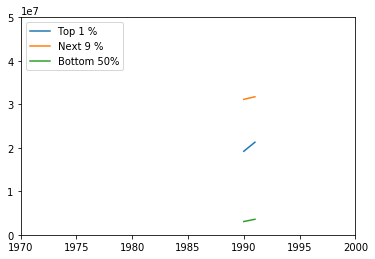

In [28]:
yearsRange = [1990, 1991];

plt.plot(yearsRange, networthforTop1)
plt.plot(yearsRange, networthforNext9 )
plt.plot(yearsRange, networthforBot50)
plt.axis ([1970,2000, 0, 50000000])
plt.legend(['Top 1 %', 'Next 9 %', 'Bottom 50%'], loc = 'upper left')

plt.show()

### Now that we've grouped the sums of each financial category for years 1990 & 1991, let's now group the original data